In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("C:/Users/fcpc/Desktop/checkpoints/titanic-passengers.csv",delimiter=";")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [13]:
#getting general insights about our data, data types, missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


**Data Preprocessing:

In [116]:
df.isnull().sum() #estimate missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [117]:
print(df['Cabin'].value_counts()) #determinig most repeated value in cabin to replace missed data values
df['Cabin'].fillna('G6',inplace=True) # replace missed values
df.head()

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
D              3
              ..
B3             1
C95            1
C47            1
B78            1
E10            1
Name: Cabin, Length: 147, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [118]:
print(df['Age'].mode()) # replaced missed age values with mode
df['Age'].fillna(df['Age'].mode(),inplace=True)
df.head()
# categ to transform: survived, sex, embarked.

0    24.0
dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


#====================

**Data has been preprocessed,missing values have been replaced thus we can move to the visualization part


#===================

In [122]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived']) #using label encoder
num={"female": 0,"male" :1}
df3=df.replace({'Sex':num }) # using dict
df3.head(10)
###
print(df['Embarked'].value_counts())
df['Embarked'].fillna('S',inplace=True)
num2={'S':1,'C':2,'Q':3}
df3=df.replace({'Embarked':num2})
df3.head()

1    646
2    168
3     77
Name: Embarked, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,1
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,1


<AxesSubplot:title={'center':'Histogram showing age distrubtion of people in titanic'}, xlabel='Age', ylabel='Frequency'>

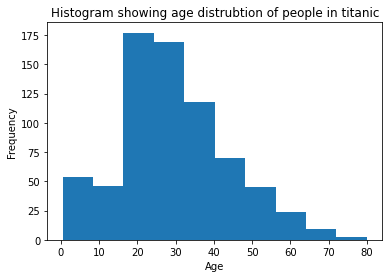

In [120]:
plt.title('Histogram showing age distrubtion of people in titanic')
plt.xlabel('Age')
df['Age'].plot.hist()


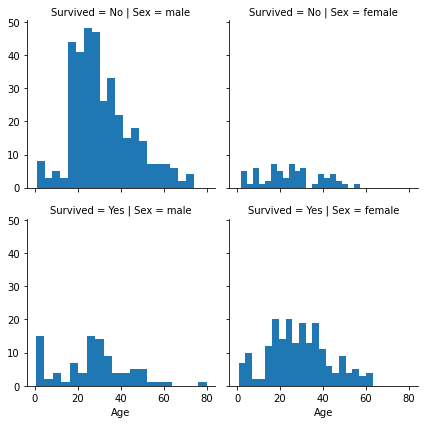

In [124]:
import seaborn as sns
g=sns.FacetGrid(df,row='Survived',col='Sex')
g.map(plt.hist,'Age',bins=20)

***TASK2***

In [77]:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    plot_correlation_map( df )

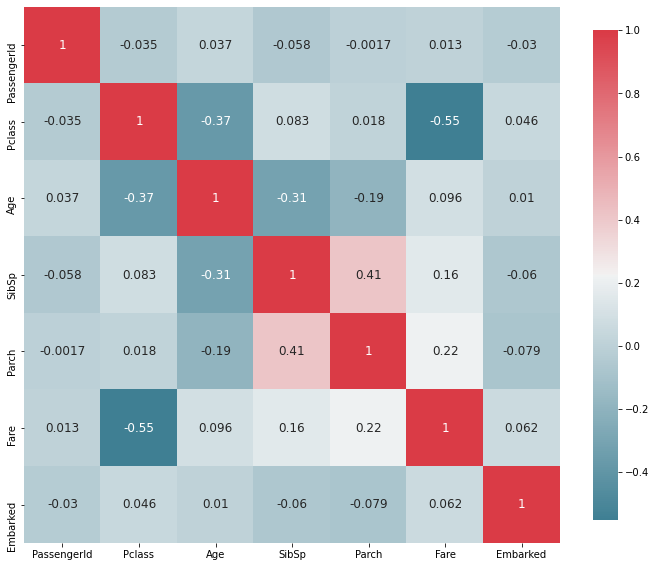

In [76]:
plot_correlation_map( df )

 **The code above shows a correlation matrix as a result which is basically a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. These coefficients vary from -1 to 1, where the higher the negative correlation between two variables, the closer the correlation coefficient will be to the value -1. By the same token, two variables with a perfect positive correlation would have a correlation coefficient of +1, while a correlation coefficient of zero implies that the two variables are uncorrelated and move independently of each other.
From the results, we notice that there's a significat negative correlation between Fare & Pclass, while others are closest to 0 which means there's no clear correlation between all these variables.

***TASK 3***

In [161]:
# Seperating Title from the name
df['Titles'] = df['Name'].str.extract(r', (\w+\.)')
df['Titles'].unique()


array(['Mr.', 'Mrs.', 'Miss.', 'Dr.', 'Major.', 'Don.', 'Master.', 'Rev.',
       'Col.', 'Mlle.', 'Lady.', 'Jonkheer.', 'Mme.', 'Sir.', 'Capt.',
       nan, 'Ms.'], dtype=object)

In [148]:
#Visualize correlation between Title and Age
df[["Titles", "Age"]].groupby(["Titles"], as_index=True).mean()

,Age
Titles,
Capt.,70.000000
Col.,58.000000
Don.,40.000000
Dr.,42.000000
Jonkheer.,38.000000
Lady.,48.000000
Major.,48.500000
Master.,4.574167
Miss.,21.773973


**This correlation has no sens because " Titles " contains a lot of attributes, we try to reduce them by using the dict defined:

In [160]:
dict= {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
print(dict)

{'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Dr': 'Officer', 'Rev': 'Officer', 'Jonkheer': 'Royalty', 'Don': 'Royalty', 'Sir': 'Royalty', 'Lady': 'Royalty', 'the Countess': 'Royalty', 'Dona': 'Royalty', 'Mme': 'Miss', 'Mlle': 'Miss', 'Miss': 'Miss', 'Ms': 'Mrs', 'Mr': 'Mrs', 'Mrs': 'Mrs', 'Master': 'Master'}
